In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import column_description

In [2]:
file_name = "E:/developer_survey_2019/survey_results_public_2019.csv"
df_19 = pd.read_csv(file_name)

schema = pd.read_csv("E:/developer_survey_2019/survey_results_schema.csv")

## Business Understanding
We will trying to find out what effect does the formal education level has on the salary, Job and career satisfication of a developer.

We should understand this because people should know this before persuing any formal eduation in order to have a career in any development field.

We will have a look at four major questions for this analysis.

In [4]:
print(column_description("EdLevel", schema))

print(column_description("ConvertedComp", schema))

print(column_description("JobSat", schema))

print(column_description("CareerSat", schema))


Which of the following best describes the highest level of formal education that you’ve completed?
Salary converted to annual USD salaries using the exchange rate on 2019-02-01, assuming 12 working months and 50 working weeks.
How satisfied are you with your current job? (If you work multiple jobs, answer for the one you spend the most hours on.)
Overall, how satisfied are you with your career thus far?


## Data Understanding
Lets look at the count of different values in JobSat(Job Satisfaction) and CareerSat( Career Satisfaction).

In [5]:
df_19["JobSat"].value_counts()

Slightly satisfied                    24207
Very satisfied                        22452
Slightly dissatisfied                 10752
Neither satisfied nor dissatisfied     8720
Very dissatisfied                      4857
Name: JobSat, dtype: int64

In [6]:
df_19["CareerSat"].value_counts()

Very satisfied                        29173
Slightly satisfied                    25018
Slightly dissatisfied                  7670
Neither satisfied nor dissatisfied     7252
Very dissatisfied                      3734
Name: CareerSat, dtype: int64

## Data Preparation
We will have a look at the null values in the cloumn.

In [7]:
df_19["CareerSat"].isnull().sum()

16036

For this particular purpose, we are ignoring the null values because they dont contribute to the business question.

Now, we will convert the different values in these columns into reting from 1 to 5

In [9]:

convert_ratings = {"JobSat": {"Very satisfied": 5, "Slightly satisfied": 4, 
                              "Neither satisfied nor dissatisfied": 3, 
                              "Slightly dissatisfied": 2, "Very dissatisfied": 1},
                  "CareerSat": {"Very satisfied": 5, "Slightly satisfied": 4, 
                              "Neither satisfied nor dissatisfied": 3, 
                              "Slightly dissatisfied": 2, "Very dissatisfied": 1}}

In [11]:
new_df = df_19.replace(convert_ratings)
new_df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


## Statistics about the data
Lets See at the average compentation with respect  to differnt education levels.

In [35]:
converted_comp = new_df.groupby(['EdLevel']).mean()['ConvertedComp'].sort_values().reset_index()
converted_comp.set_index('EdLevel', inplace=True)
converted_comp

,ConvertedComp
EdLevel,
"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",85330.023734
"Professional degree (JD, MD, etc.)",86490.193289
Primary/elementary school,95072.546154
Some college/university study without earning a degree,117587.731065
"Master’s degree (MA, MS, M.Eng., MBA, etc.)",120712.385650
"Bachelor’s degree (BA, BS, B.Eng., etc.)",134966.131508
Associate degree,146191.275269
I never completed any formal education,154087.313636
"Other doctoral degree (Ph.D, Ed.D., etc.)",171504.379046


In general, the compensation does seem to have an effect on compensation but it isnt direct. for instance, the highest compensation belongs to the developers having doctoral degree or people who have never completed any formal education.

In [36]:
job_sat = new_df.groupby(['EdLevel']).mean()['JobSat'].sort_values().reset_index()
job_sat.set_index('EdLevel', inplace=True)
job_sat

,JobSat
EdLevel,
I never completed any formal education,3.401216
"Professional degree (JD, MD, etc.)",3.435614
Primary/elementary school,3.590028
"Bachelor’s degree (BA, BS, B.Eng., etc.)",3.664674
"Master’s degree (MA, MS, M.Eng., MBA, etc.)",3.694469
Some college/university study without earning a degree,3.706683
Associate degree,3.730283
"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",3.750000
"Other doctoral degree (Ph.D, Ed.D., etc.)",3.905025


Job satisfaction does show a similar trend but its much more direct and this does show that having a formal education leads to more job satisfaction

In [37]:
career_sat = new_df.groupby(['EdLevel']).mean()['CareerSat'].sort_values().reset_index()
career_sat.set_index('EdLevel', inplace=True)
career_sat

,CareerSat
EdLevel,
I never completed any formal education,3.543353
"Professional degree (JD, MD, etc.)",3.683482
Primary/elementary school,3.703125
"Master’s degree (MA, MS, M.Eng., MBA, etc.)",3.908123
"Bachelor’s degree (BA, BS, B.Eng., etc.)",3.947891
Some college/university study without earning a degree,3.955605
"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",3.977008
Associate degree,4.001264
"Other doctoral degree (Ph.D, Ed.D., etc.)",4.062218


Career satisfaction follows almost a similar trend with Job Satisfaction

Let's merge the above dataframes in order to visualize them side by side

In [38]:
salary_jobsat = pd.merge(converted_comp, job_sat, on='EdLevel')
salary_job_career = pd.merge(salary_jobsat, career_sat, on='EdLevel')
salary_job_career

,ConvertedComp,JobSat,CareerSat
EdLevel,,,
"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",85330.023734,3.750000,3.977008
"Professional degree (JD, MD, etc.)",86490.193289,3.435614,3.683482
Primary/elementary school,95072.546154,3.590028,3.703125
Some college/university study without earning a degree,117587.731065,3.706683,3.955605
"Master’s degree (MA, MS, M.Eng., MBA, etc.)",120712.385650,3.694469,3.908123
"Bachelor’s degree (BA, BS, B.Eng., etc.)",134966.131508,3.664674,3.947891
Associate degree,146191.275269,3.730283,4.001264
I never completed any formal education,154087.313636,3.401216,3.543353
"Other doctoral degree (Ph.D, Ed.D., etc.)",171504.379046,3.905025,4.062218


In [40]:
salary_job_career['ConvertedComp'] = (salary_job_career['ConvertedComp'] - salary_job_career['ConvertedComp'].mean())/salary_job_career['ConvertedComp'].sum()
salary_job_career['JobSat'] = salary_job_career['JobSat'] - salary_job_career['JobSat'].mean()
salary_job_career['CareerSat'] = salary_job_career['CareerSat'] - salary_job_career['CareerSat'].mean()

In [41]:

salary_job_career.index = ['Secondary school ',
                           'Professional degree (JD, MD, etc.)', 'Primary/elementary school',
                           'Some college/university study without earning a degree',
                           'Master’s degree (MA, MS, M.Eng., MBA, etc.)',
                           'Bachelor’s degree (BA, BS, B.Eng., etc.)', 'Associate degree',
                           'I never completed any formal education',
                           'Other doctoral degree (Ph.D, Ed.D., etc.)']

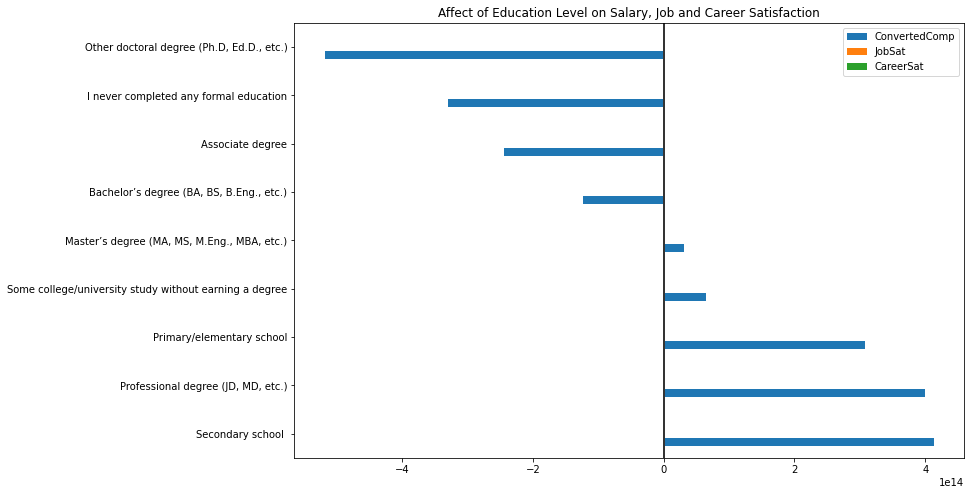

In [47]:
(salary_job_career).plot(kind='barh',
                         title='Affect of Education Level on Salary, Job and Career Satisfaction',
                         figsize=(12,8))

for i in [-0.3, -0.2, -0.1, 0.1, 0.2]:
    plt.axvline(x=i, color='lightgrey')
plt.axvline(x=0, color='black')

## Result

From the plot, it seems most of the degrees affect all three aspects in the positive direction with the exception of Professional degree which affects them all in a negative way. What's interesting to see is although not having a formal education can result in a higher salary, it affects career and job satisfaction in a heavily in a negative way

## Thank You